## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [16]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.7 Exploring Data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [21]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
reading_full = df[df['reading score'] == 100]['average'].count()
#.count(): This counts the number of non-null values in that average column for those specific students
#or simply reading_full = len(df[df['reading_score'] == 100]
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [24]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

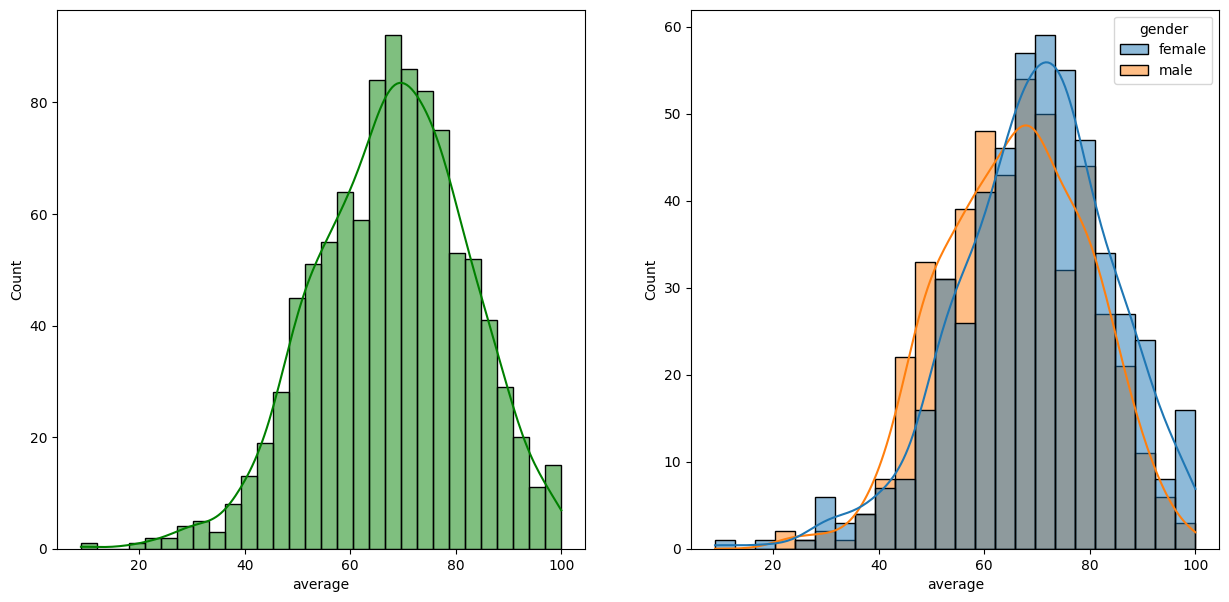

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

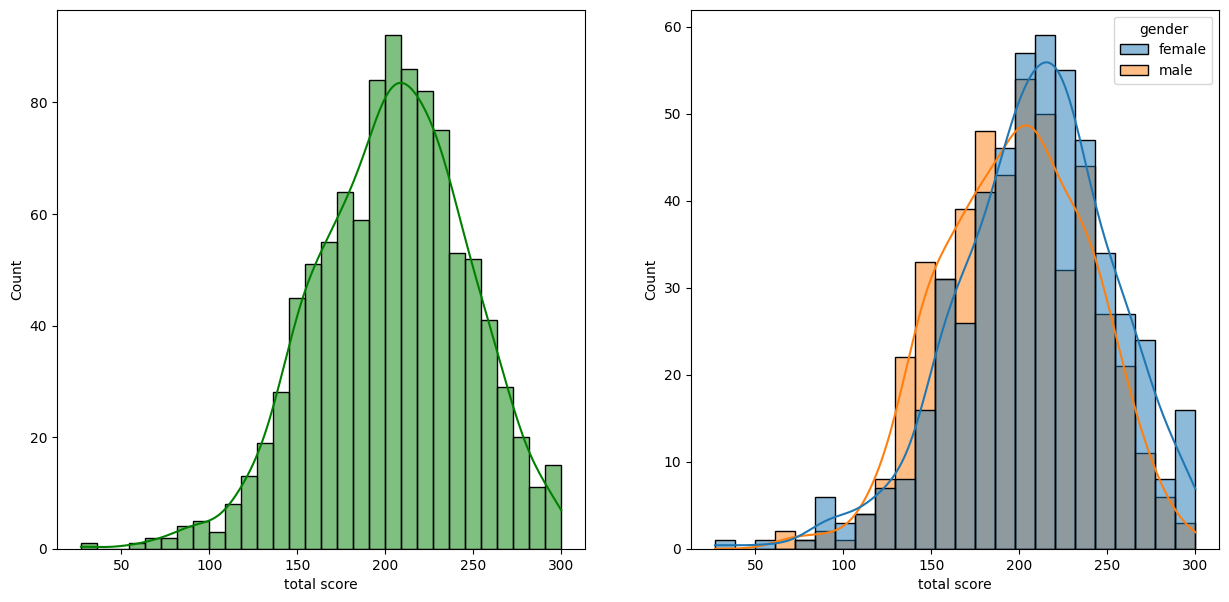

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

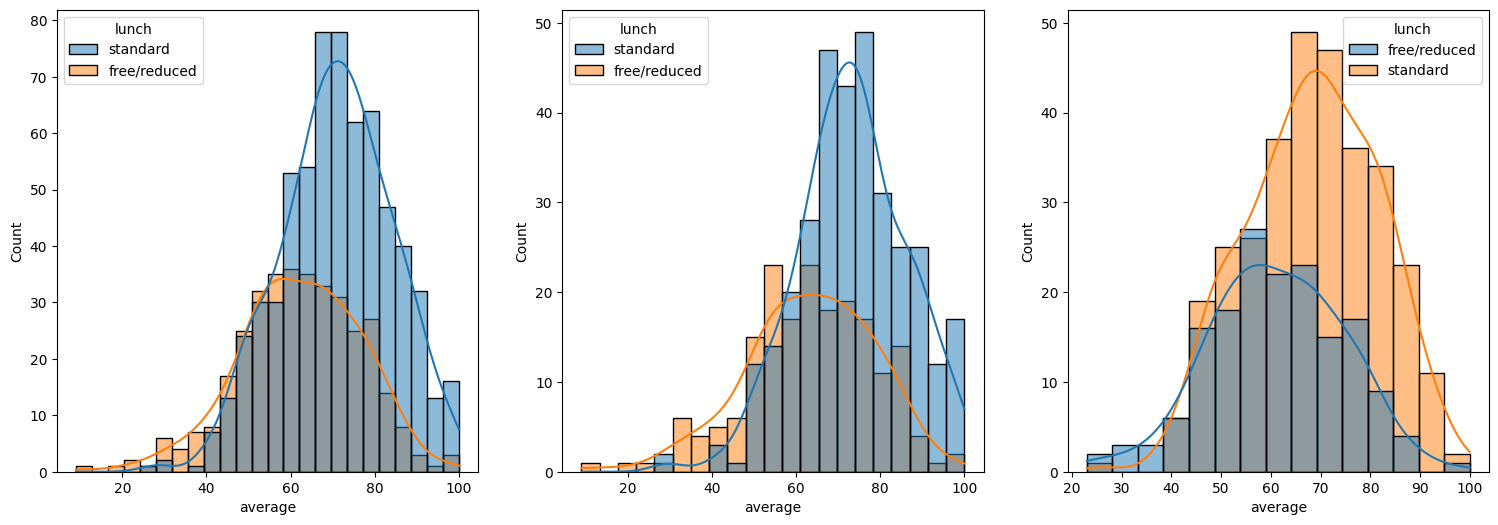

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

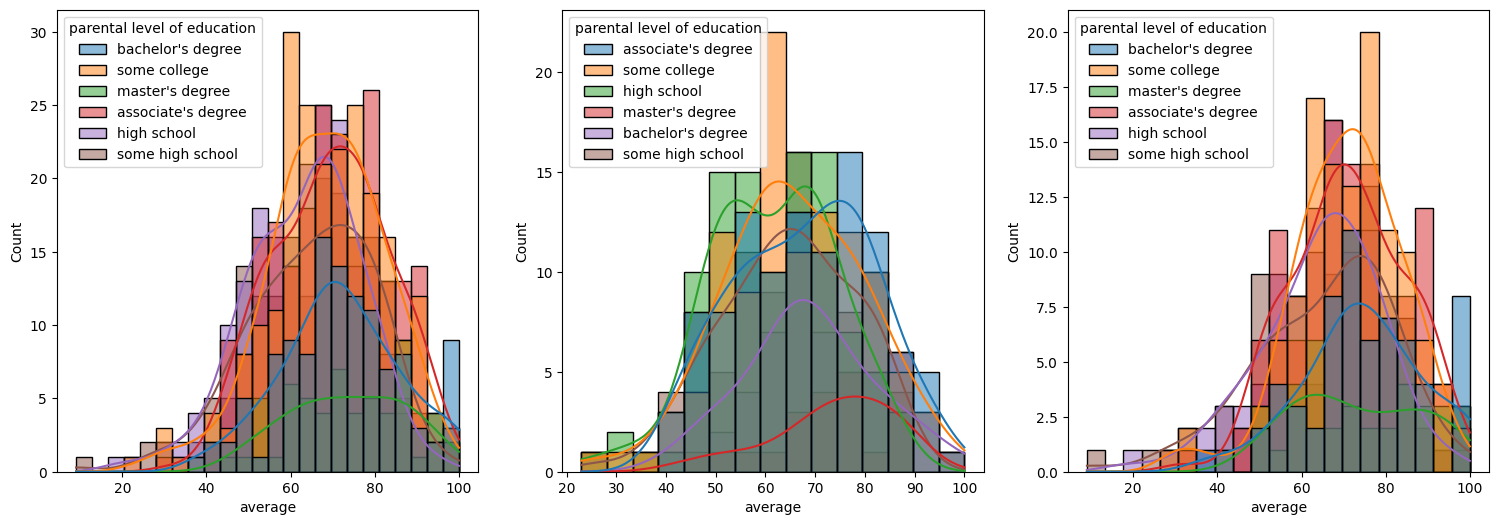

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

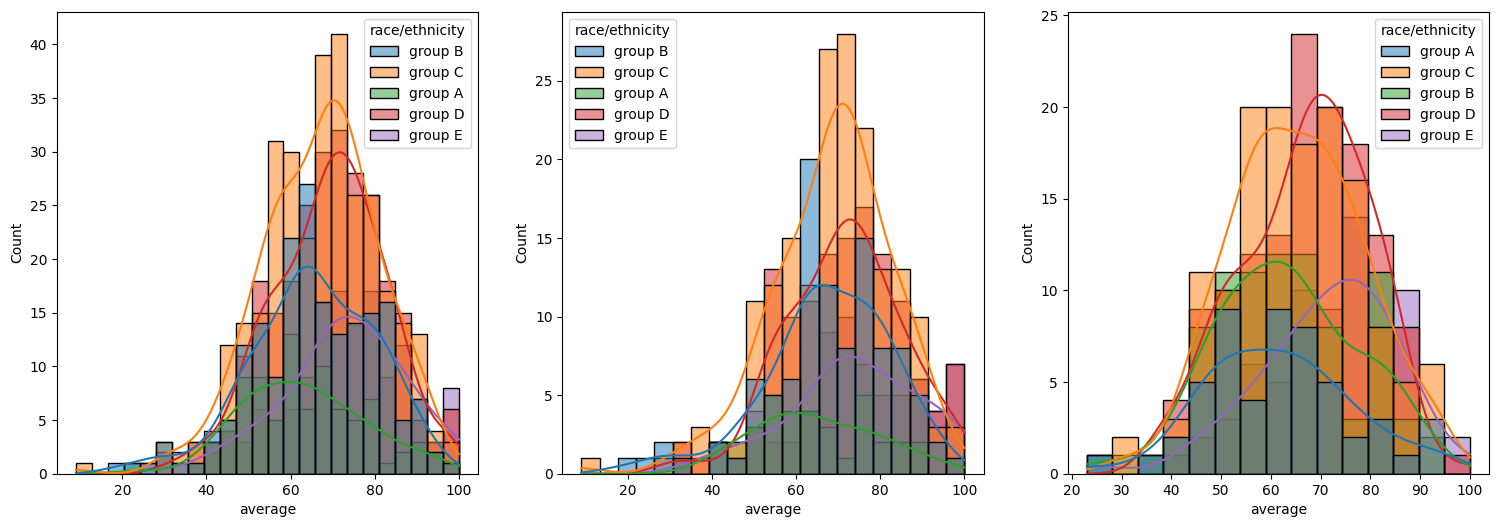

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

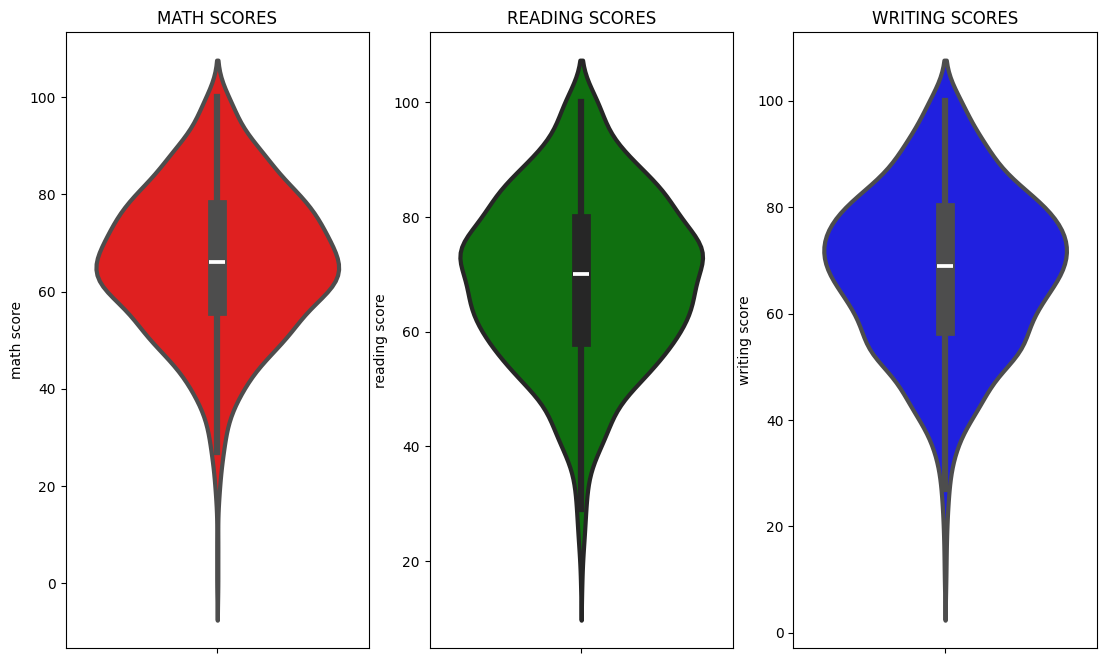

In [31]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

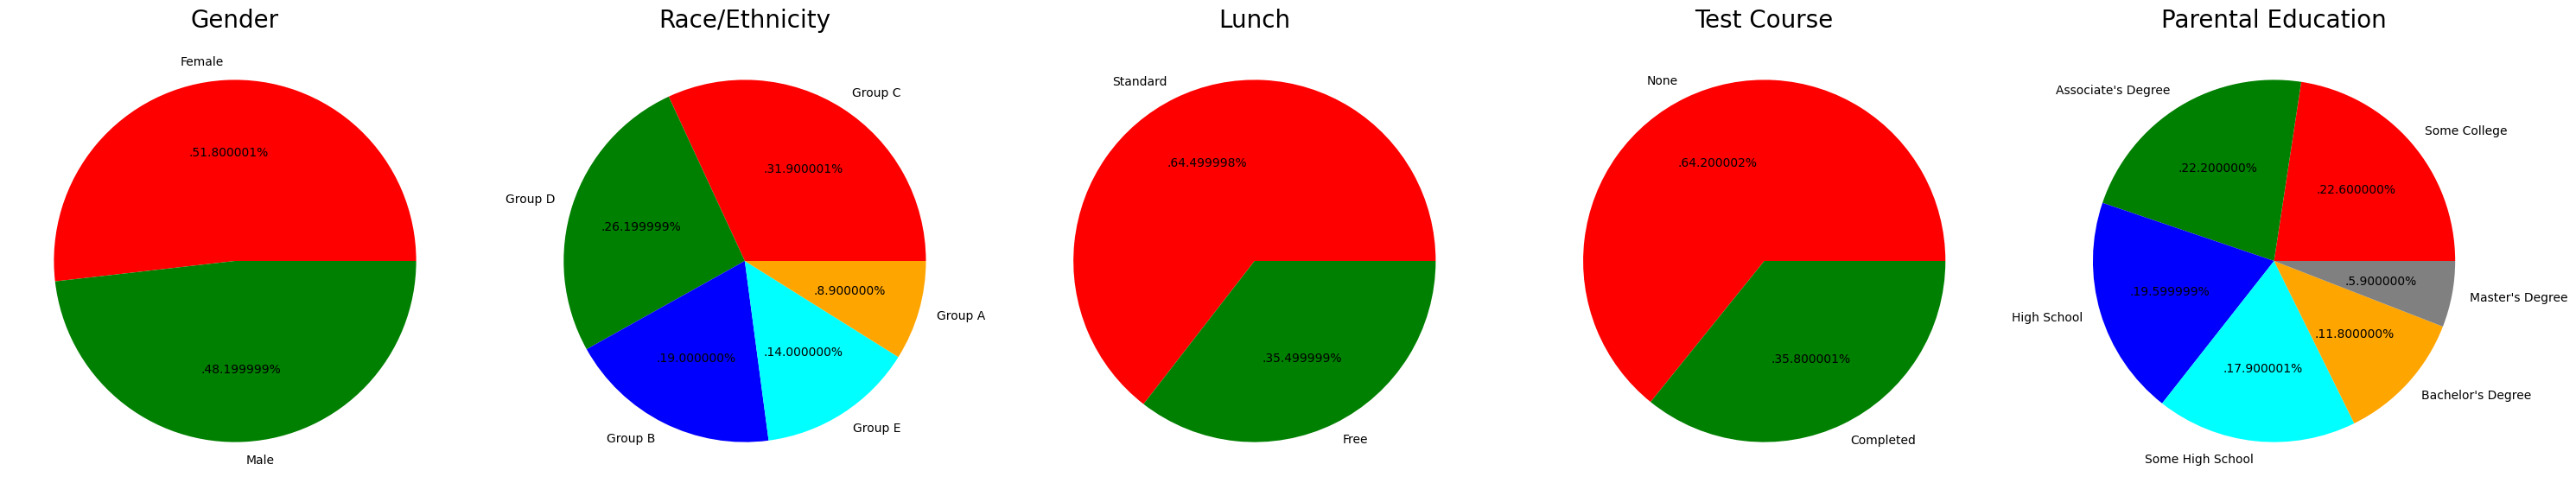

In [38]:
# Set the default figure size for all plots (width=30 inches, height=12 inches)
plt.rcParams['figure.figsize'] = (30, 12)

# Create a 1x5 grid of subplots and select the first position
plt.subplot(1, 5, 1)  # (rows, columns, position)

# Get value counts for 'gender' column
size = df['gender'].value_counts()
labels = 'Female', 'Male'  # Labels for pie chart segments
color = ['red','green']  # Colors for each segment

# Create pie chart with specified properties:
# - size: data values for each segment
# - colors: segment colors
# - labels: segment labels  
# - autopct: format for percentage display (.2f means 2 decimal places)
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)  # Set title with font size
plt.axis('off')  # Hide axes for pie chart



# Second subplot (position 2 in the 1x5 grid)
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']  # Color for each group

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



# Third subplot (position 3)
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


# Fourth subplot (position 4)
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


# Fifth subplot (position 5)
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']  # 6 colors for 6 categories

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


# Adjust spacing between subplots to prevent overlapping
plt.tight_layout()
plt.grid()  # Add grid to the figure (though with axis off, this won't be visible)

# Display the complete figure with all 5 pie charts
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

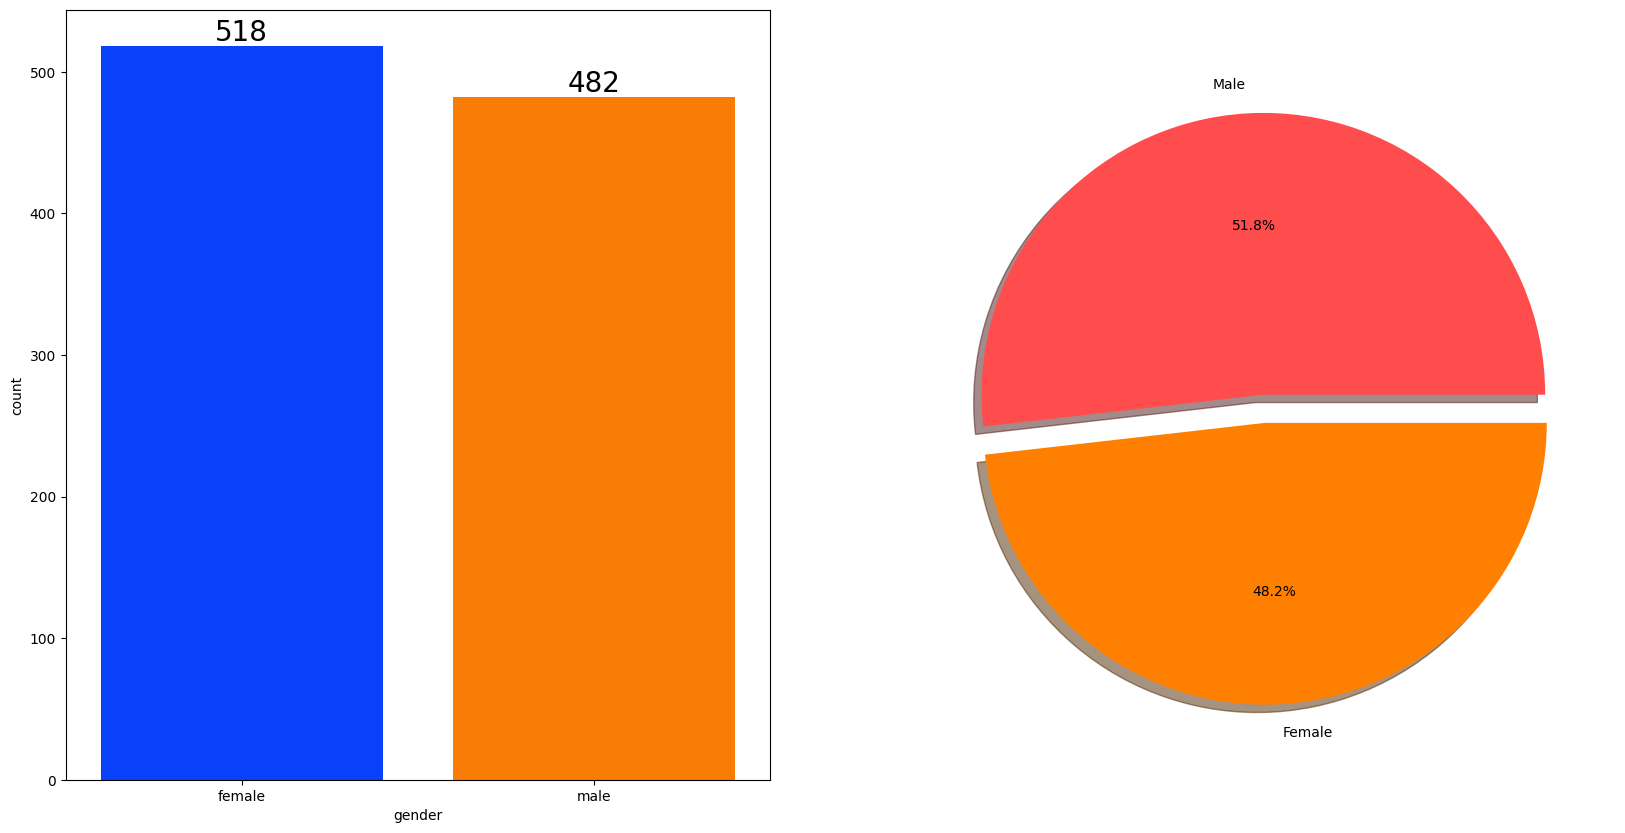

In [40]:
# Create a figure with 1 row and 2 columns of subplots, with figure size 20x10
# f: figure object, ax: array of axes objects (2 axes since we have 2 subplots)
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# First subplot: Countplot (bar chart showing counts)
# ax[0] refers to the first subplot (index 0)
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add value labels on top of each bar in the countplot
# ax[0].containers contains the bar container objects
for container in ax[0].containers:
    # bar_label adds the count value on top of each bar
    ax[0].bar_label(container, color='black', size=20)
    
# Second subplot: Pie chart
# Since we didn't specify ax parameter, matplotlib uses the current active axis (ax[1])
# x: data for pie chart (value counts of gender)
# labels: labels for pie segments
# explode: pulls out the 'Female' segment by 0.1 (creates separation effect)
# autopct: formats percentage display to 1 decimal place
# shadow: adds shadow effect to pie chart
# colors: custom colors for each segment
plt.pie(x=df['gender'].value_counts(), 
        labels=['Male', 'Female'], 
        explode=[0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=['#ff4d4d', '#ff8000'])

# Display the figure with both subplots
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [ ]:
# Direct approach with numeric_only parameter
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

# If we only want mean of specific numeric columns (like test scores) gender_group = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()


        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


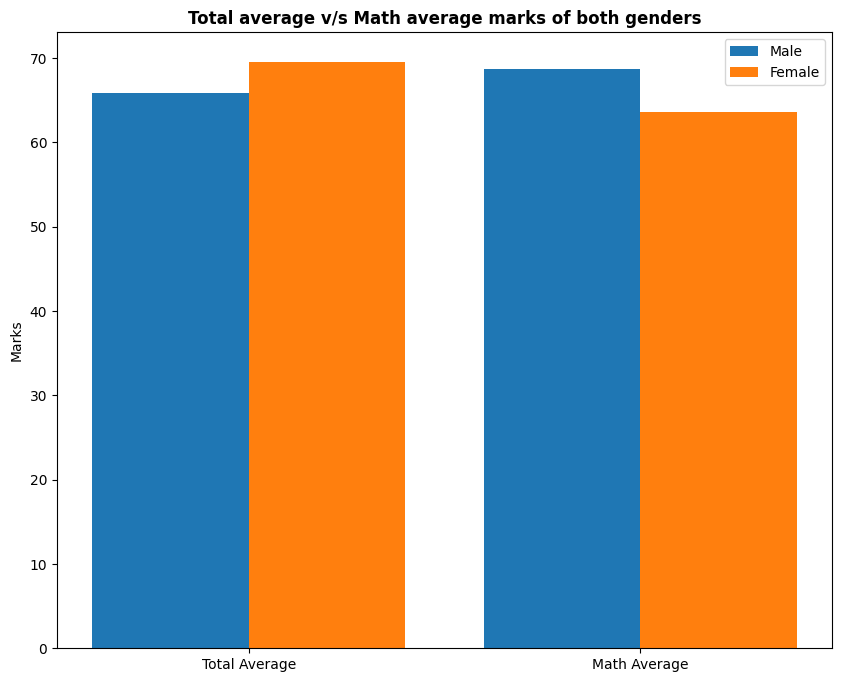

In [45]:
# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Define the categories/labels for x-axis
X = ['Total Average', 'Math Average']

# Assuming gender_group is a DataFrame grouped by 'gender' with average scores
# You need to ensure gender_group has the right structure first

# Get female and male scores
# Note: Make sure your gender_group DataFrame has 'average' and 'math score' columns
female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

# Alternative approach to handle indexing better:
# female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
# male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

# Create an array for x-axis positions
X_axis = np.arange(len(X))  # Creates array [0, 1, 2, ...] based on number of categories
  
# Create grouped bar chart
# X_axis - 0.2: Positions bars slightly left for male
# X_axis + 0.2: Positions bars slightly right for female
# 0.4: Width of each bar
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
  
# Set x-axis tick labels
plt.xticks(X_axis, X)
plt.ylabel("Marks")  # Label for y-axis
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()  # Show legend
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

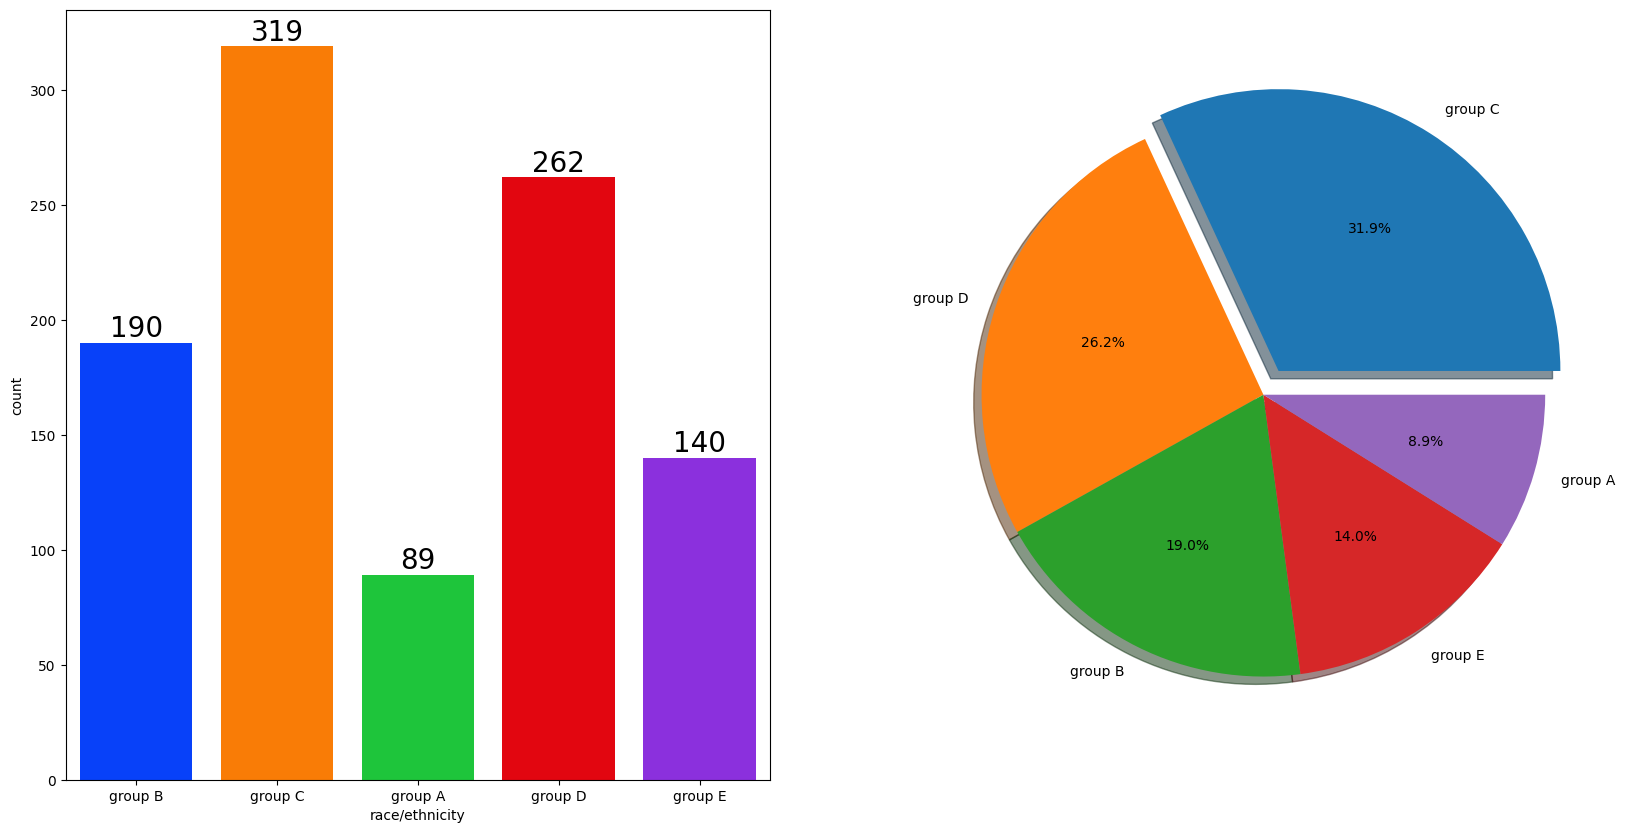

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

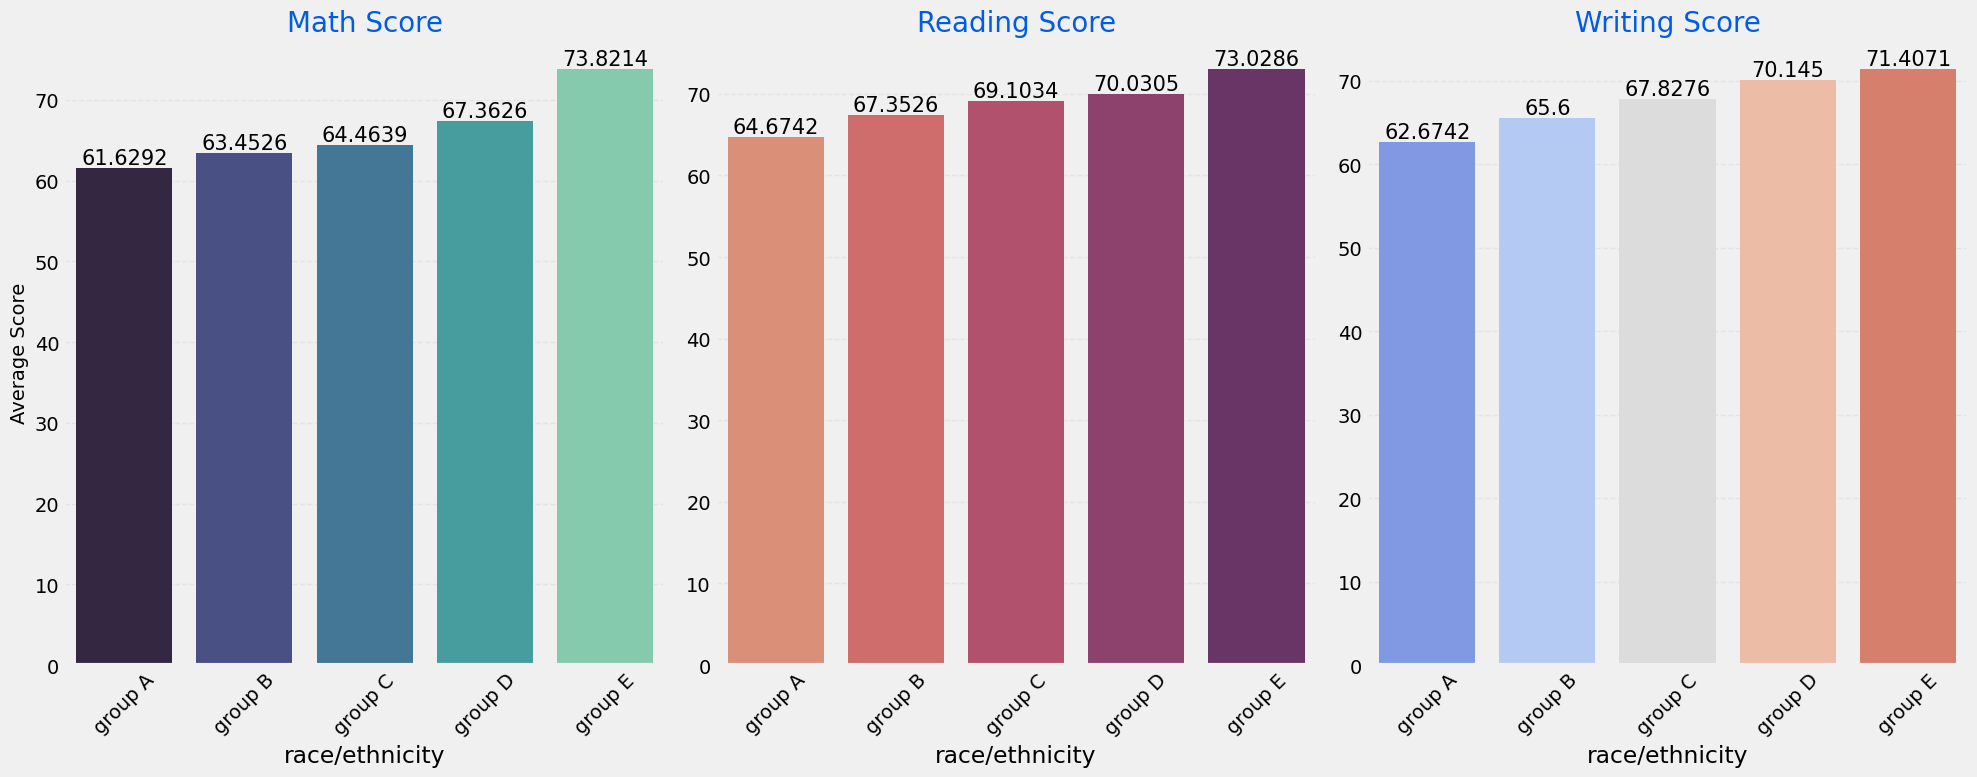

In [52]:
Group_data2 = df.groupby('race/ethnicity')

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Store the metrics we want to plot to avoid repetition
metrics = ['math score', 'reading score', 'writing score']
palettes = ['mako', 'flare', 'coolwarm']
titles = ['Math Score', 'Reading Score', 'Writing Score']

for i, (metric, palette, title) in enumerate(zip(metrics, palettes, titles)):
    # Calculate mean for current metric
    mean_values = Group_data2[metric].mean()
    
    # Create bar plot
    sns.barplot(x=mean_values.index, 
                y=mean_values.values, 
                palette=palette, 
                ax=ax[i])
    
    # Set title
    ax[i].set_title(title, color='#005ce6', size=20)
    
    # Add value labels
    for container in ax[i].containers:
        ax[i].bar_label(container, color='black', size=15)
    
    # Rotate x-axis labels if needed for readability
    ax[i].tick_params(axis='x', rotation=45)
    
    # Set y-axis label for first plot only
    if i == 0:
        ax[i].set_ylabel('Average Score', size=14)
    
    # Add grid for better readability
    ax[i].grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

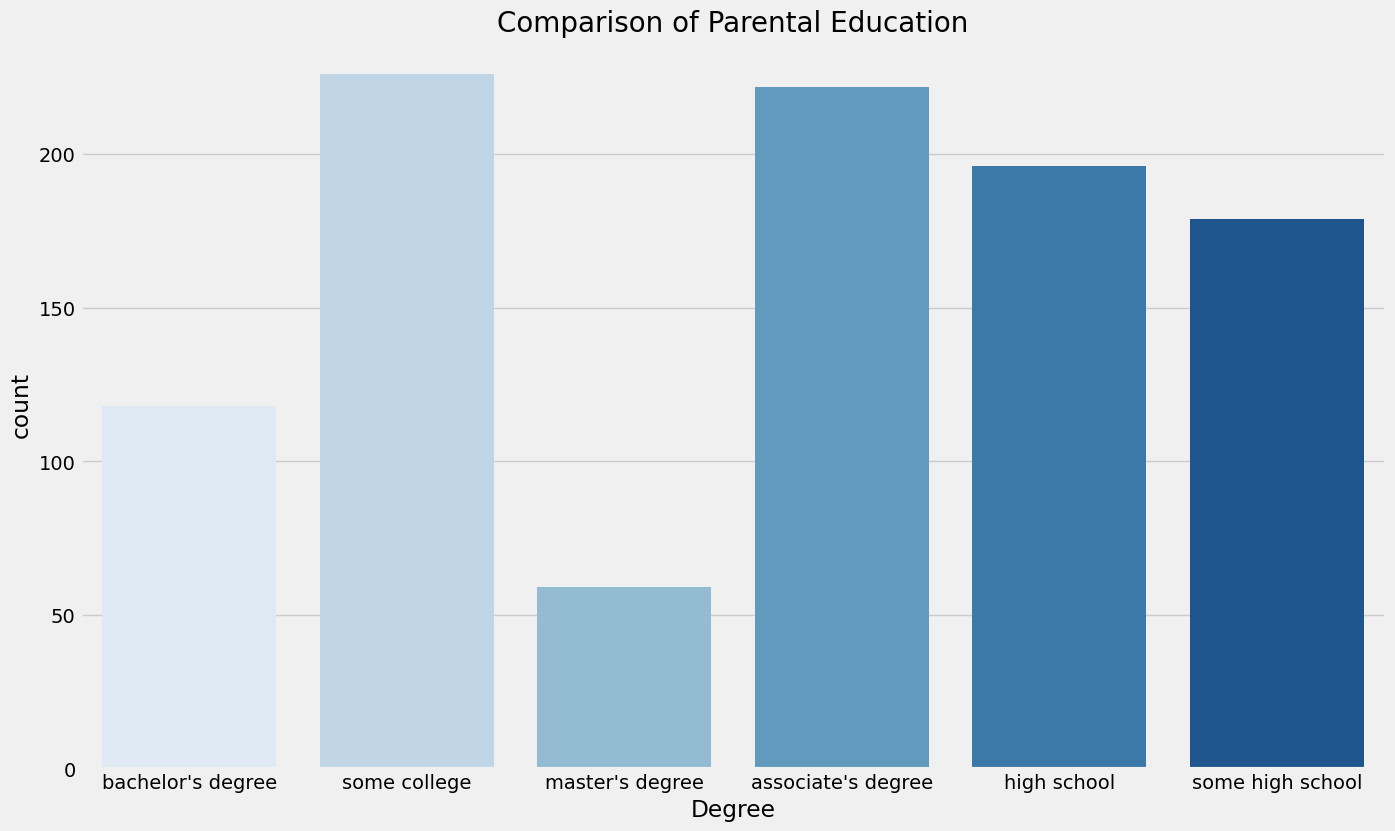

In [53]:
# Set default figure size for all plots to 15x9 inches
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'fivethirtyeight' matplotlib style
# This style mimics the visual style of FiveThirtyEight website
# Features: grey background, dark grid lines, specific font styling
plt.style.use('fivethirtyeight')

# Create a count plot (bar chart) for parental education levels
# df['parental level of education']: The categorical column to count
# palette='Blues': Uses matplotlib's 'Blues' color palette (sequential blues)
sns.countplot(x=df['parental level of education'], palette='Blues')
# Note: In newer versions of seaborn, you might need to specify data parameter:
# sns.countplot(x='parental level of education', data=df, palette='Blues')

# Set the plot title with custom font weight and size
# fontweight=30: Higher number = bolder text (though typically use 'bold', 'semibold', etc.)
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)

# Set x-axis label
plt.xlabel('Degree')
# Set y-axis label
plt.ylabel('count')

# Display the plot
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

<Axes: ylabel='parental level of education'>

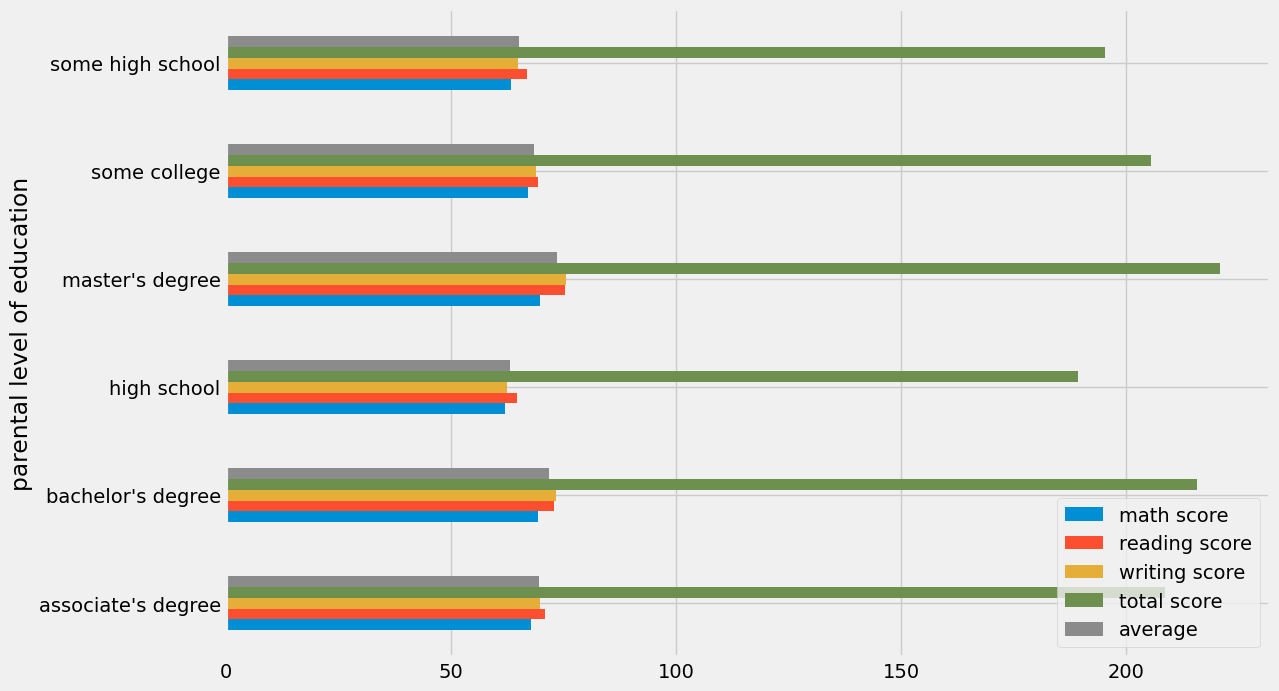

In [ ]:
#  Select only numeric columns for mean calculation
# Method 1: Using numeric_only parameter (pandas 1.5+)

df.groupby('parental level of education').mean(numeric_only=True).plot(
    kind='barh', 
    figsize=(12, 8)
)

# Method 2: Select specific columns
#score_columns = ['math score', 'reading score', 'writing score']
#df.groupby('parental level of education')[score_columns].mean().plot(
 #   kind='barh', 
  #  figsize=(12, 8)
#)



#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

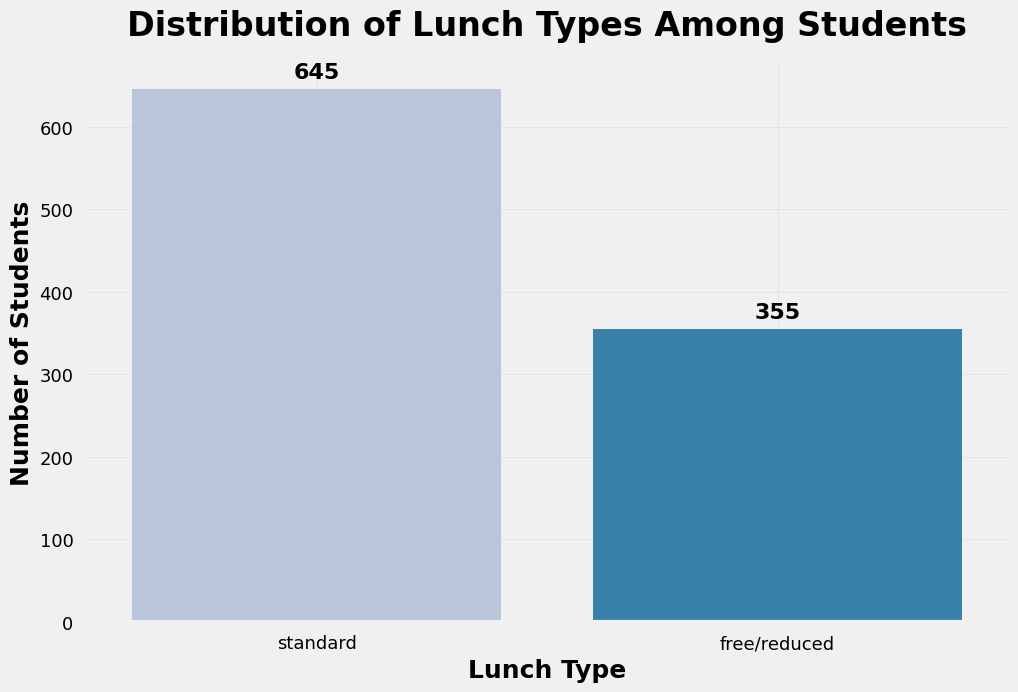

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Create count plot with explicit parameters
# Using order to control bar ordering
lunch_order = df['lunch'].value_counts().index
sns.countplot(x='lunch', 
              data=df, 
              palette='PuBu',
              order=lunch_order)

# Set title with proper font weight naming
plt.title('Distribution of Lunch Types Among Students', 
          fontweight='bold', 
          fontsize=24,  # Larger for 'talk' style
          pad=20)  # Padding above title

# Set axis labels
plt.xlabel('Lunch Type', fontsize=18, fontweight='semibold')
plt.ylabel('Number of Students', fontsize=18, fontweight='semibold')

# Add value labels on top of bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, 
                 fontsize=16,  # Larger font for presentation
                 color='black', 
                 fontweight='bold',
                 padding=5)

# Customize grid (seaborn-talk already has grid)
ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# Remove spines for cleaner look (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

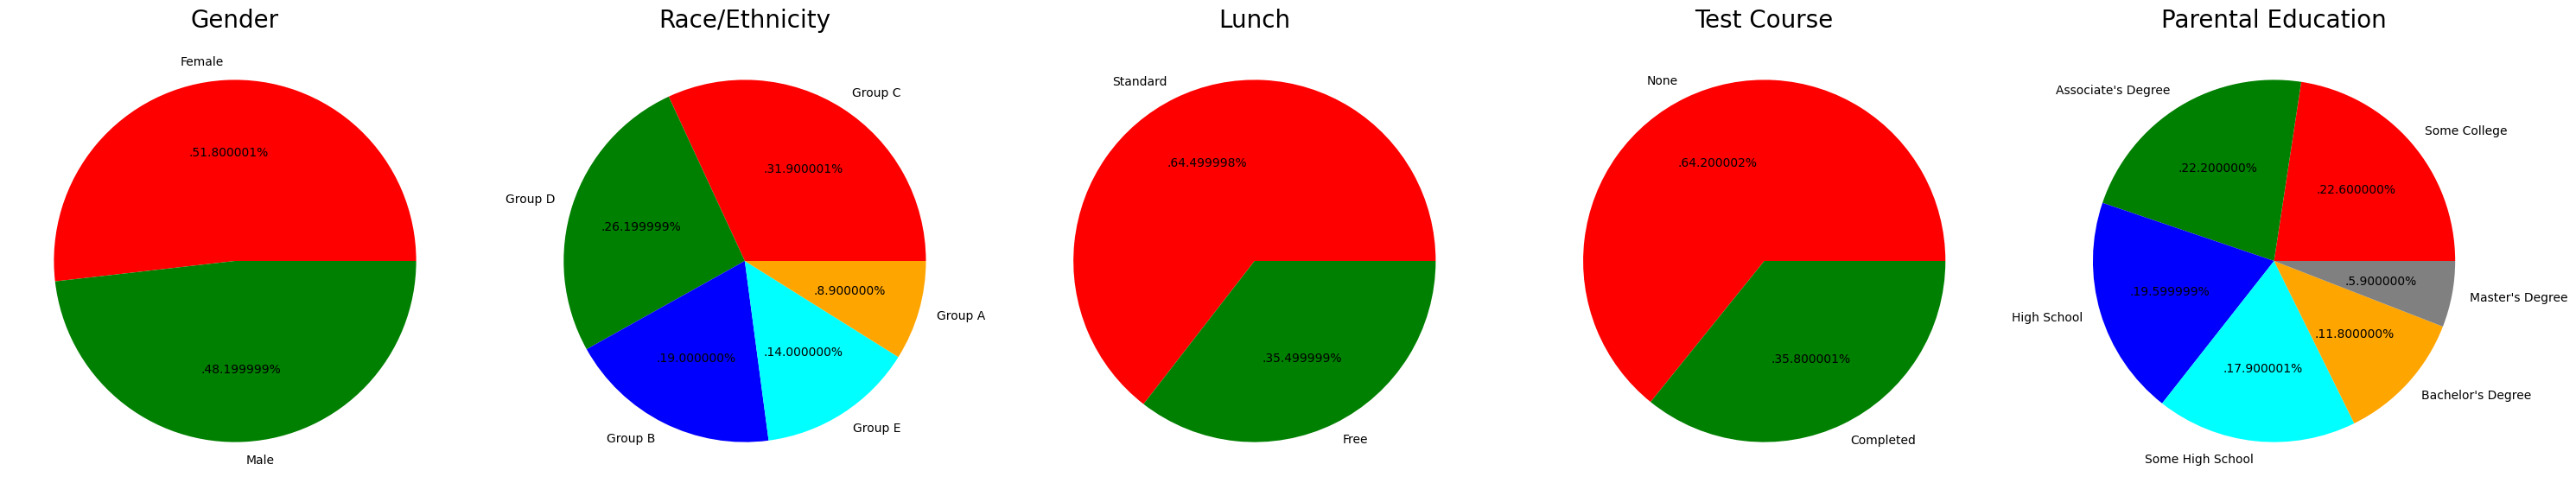

In [ ]:
# Set the default figure size for all plots (width=30 inches, height=12 inches)
plt.rcParams['figure.figsize'] = (30, 12)

# Create a 1x5 grid of subplots and select the first position
plt.subplot(1, 5, 1)  # (rows, columns, position)

# Get value counts for 'gender' column
size = df['gender'].value_counts()
labels = 'Female', 'Male'  # Labels for pie chart segments
color = ['red','green']  # Colors for each segment

# Create pie chart with specified properties:
# - size: data values for each segment
# - colors: segment colors
# - labels: segment labels  
# - autopct: format for percentage display (.2f means 2 decimal places)
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)  # Set title with font size
plt.axis('off')  # Hide axes for pie chart



# Second subplot (position 2 in the 1x5 grid)
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']  # Color for each group

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



# Third subplot (position 3)
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


# Fourth subplot (position 4)
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


# Fifth subplot (position 5)
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']  # 6 colors for 6 categories

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


# Adjust spacing between subplots to prevent overlapping
plt.tight_layout()
plt.grid()  # Add grid to the figure (though with axis off, this won't be visible)

# Display the complete figure with all 5 pie charts
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

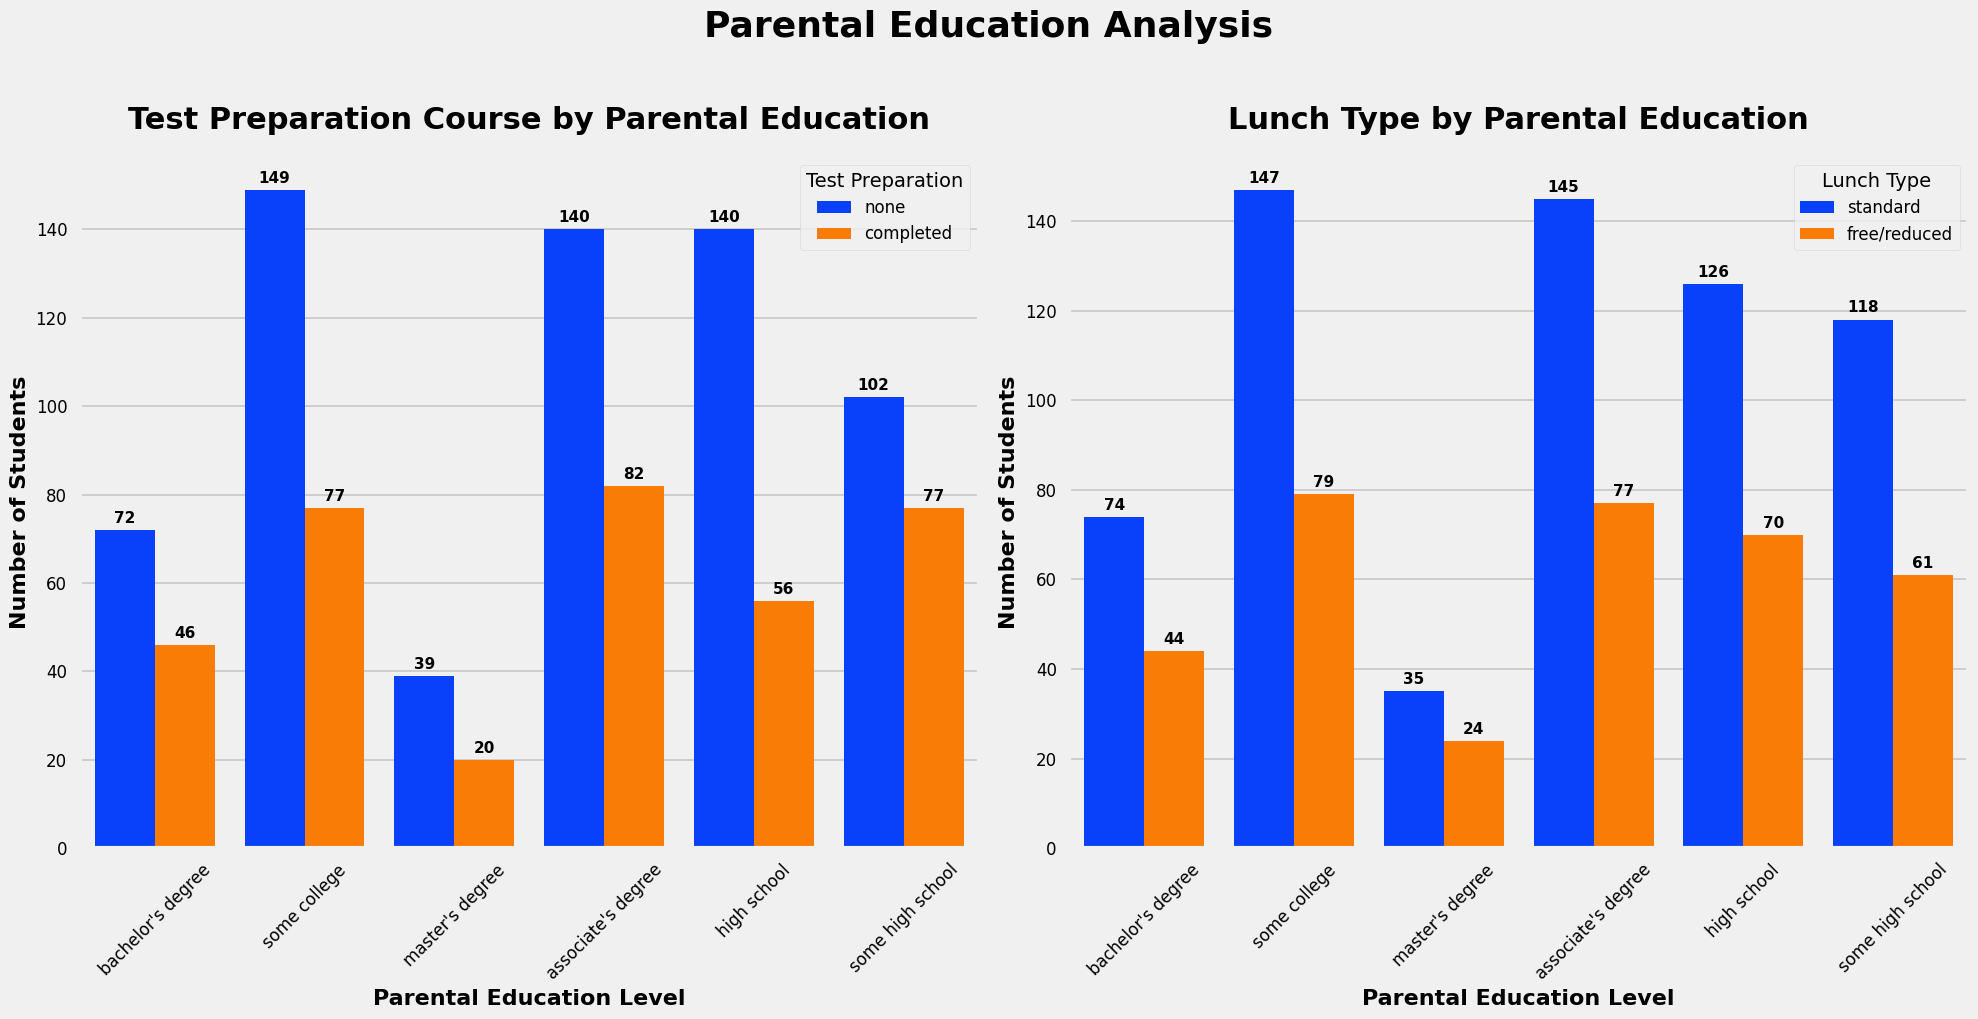

In [60]:
# Create figure and axes
f, ax = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# ===== FIRST SUBPLOT: Test Preparation Course =====
sns.countplot(x='parental level of education', 
              data=df, 
              hue='test preparation course',
              palette='bright',  # Alternative: palette=['#FF6B6B', '#4ECDC4']
              saturation=0.95,
              ax=ax[0])

# Customize first subplot
ax[0].set_title('Test Preparation Course by Parental Education', 
                fontsize=22, 
                fontweight='bold',
                pad=20)
ax[0].set_xlabel('Parental Education Level', fontsize=16, fontweight='semibold')
ax[0].set_ylabel('Number of Students', fontsize=16, fontweight='semibold')
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Add value labels with better positioning
for container in ax[0].containers:
    ax[0].bar_label(container, 
                    fontsize=11, 
                    fontweight='bold',
                    padding=3,  # Space between bar top and label
                    color='black')

# Add legend title
ax[0].legend(title='Test Preparation', 
             title_fontsize=14,
             fontsize=12,
             loc='upper right')



# ===== SECOND SUBPLOT: Lunch Type =====
sns.countplot(x='parental level of education', 
              data=df, 
              hue='lunch',
              palette='bright',
              saturation=0.95,
              ax=ax[1])

# Customize second subplot
ax[1].set_title('Lunch Type by Parental Education', 
                fontsize=22, 
                fontweight='bold',
                pad=20)
ax[1].set_xlabel('Parental Education Level', fontsize=16, fontweight='semibold')
ax[1].set_ylabel('Number of Students', fontsize=16, fontweight='semibold')
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

# Add value labels
for container in ax[1].containers:
    ax[1].bar_label(container, 
                    fontsize=11, 
                    fontweight='bold',
                    padding=3,
                    color='black')

# Add legend title
ax[1].legend(title='Lunch Type', 
             title_fontsize=14,
             fontsize=12,
             loc='upper right')

# Add overall figure title (optional)
f.suptitle('Parental Education Analysis', fontsize=26, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

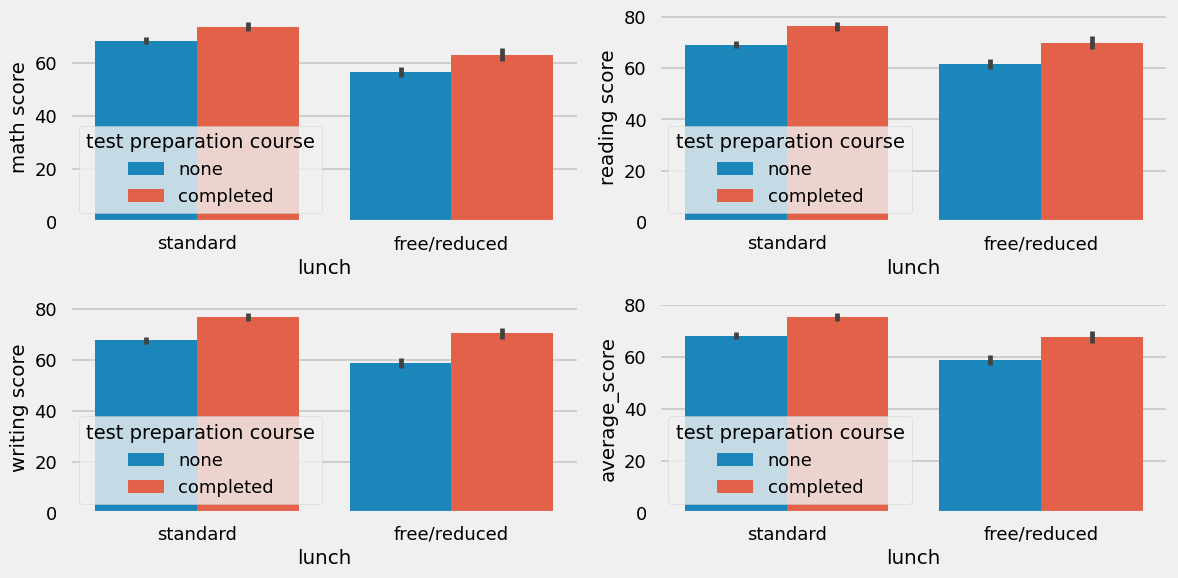

In [62]:
# Create a new figure with size 12x6 inches
plt.figure(figsize=(12, 6))

# FIRST SUBPLOT (top-left): Math Score Comparison ----------------------
# plt.subplot(2, 2, 1): Creates 2x2 grid, selects position 1 (top-left)
# sns.barplot: Creates bar plot showing mean scores
# - x=df['lunch']: Lunch type on x-axis (categorical)
# - y=df['math score']: Math scores on y-axis (numeric)
# - hue=df['test preparation course']: Groups bars by test prep status
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], 
            y=df['math score'], 
            hue=df['test preparation course'])
# Note: By default, barplot shows mean with 95% confidence interval



# SECOND SUBPLOT (top-right): Reading Score Comparison -----------------
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], 
            y=df['reading score'], 
            hue=df['test preparation course'])



# THIRD SUBPLOT (bottom-left): Writing Score Comparison -----------------
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], 
            y=df['writing score'], 
            hue=df['test preparation course'])



# FOURTH SUBPLOT (bottom-right): [MISSING - could be average score] ----
plt.subplot(2, 2, 4)
# Example: Average of all scores
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.barplot(x=df['lunch'], 
            y=df['average_score'], 
            hue=df['test preparation course'])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

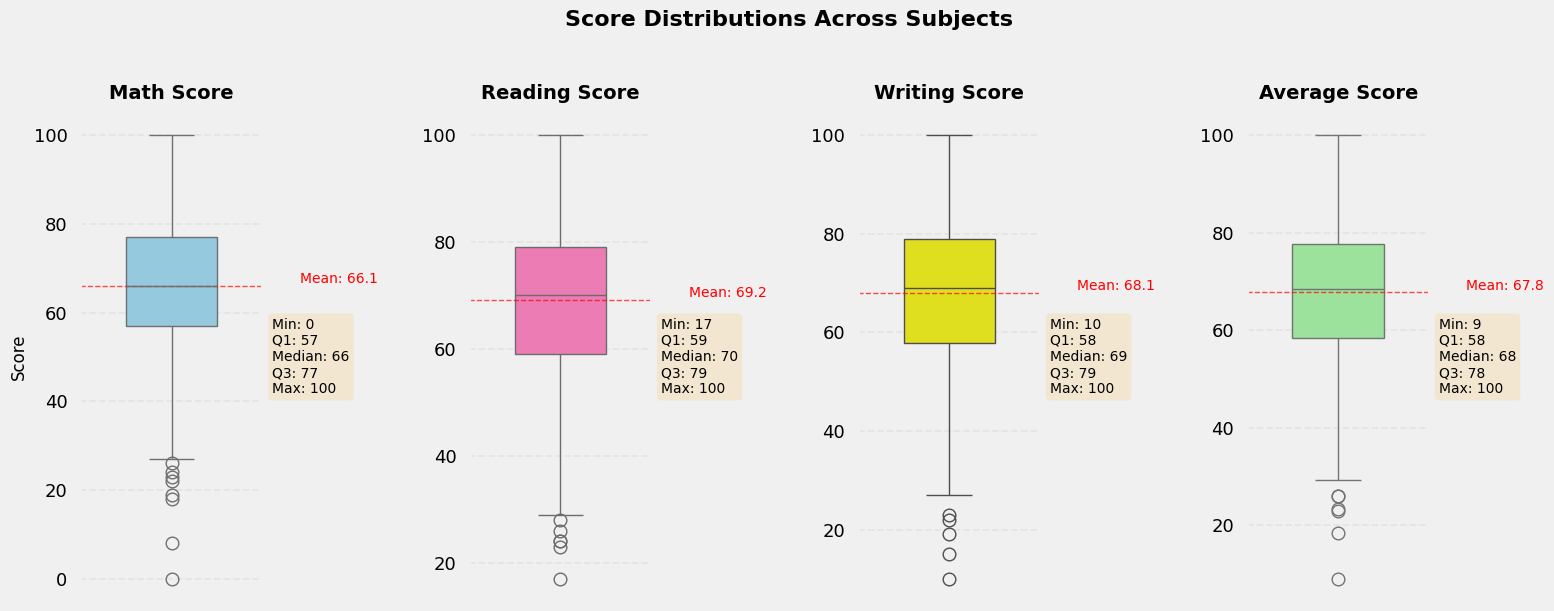

In [64]:
# Create figure and axes explicitly for better control
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Define the data to plot
data_to_plot = [
    ('Math Score', df['math score'], 'skyblue'),
    ('Reading Score', df['reading score'], 'hotpink'),
    ('Writing Score', df['writing score'], 'yellow'),
    ('Average Score', df['average'], 'lightgreen')
]

# Create boxplots for each subject
for i, (title, data, color) in enumerate(data_to_plot):
    # Create boxplot on each axis
    sns.boxplot(y=data, ax=axes[i], color=color, width=0.5)
    
    # Add title
    axes[i].set_title(title, fontsize=14, fontweight='bold', pad=10)
    
    # Add y-axis label (only for first plot to avoid repetition)
    if i == 0:
        axes[i].set_ylabel('Score', fontsize=12)
    else:
        axes[i].set_ylabel('')
    
    # Add grid for better readability
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add mean marker (optional)
    mean_val = data.mean()
    axes[i].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, linewidth=1)
    axes[i].text(0.7, mean_val + 0.5, f'Mean: {mean_val:.1f}', 
                color='red', fontsize=10, transform=axes[i].transData)
    
    # Add statistics text
    stats_text = f'Min: {data.min():.0f}\nQ1: {data.quantile(0.25):.0f}\nMedian: {data.median():.0f}\nQ3: {data.quantile(0.75):.0f}\nMax: {data.max():.0f}'
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                fontsize=10, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add overall title
fig.suptitle('Score Distributions Across Subjects', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

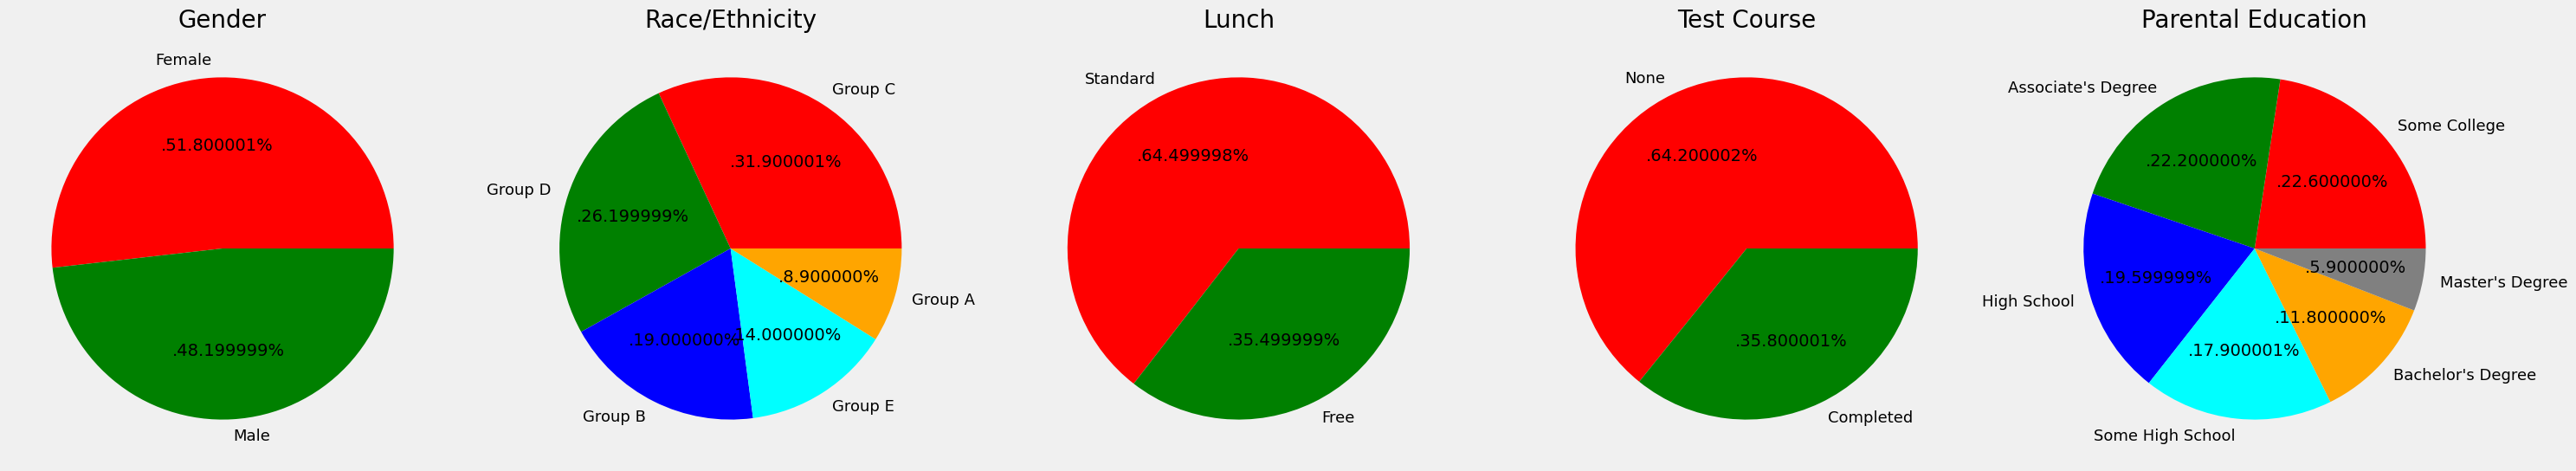

In [65]:
# Set the default figure size for all plots (width=30 inches, height=12 inches)
plt.rcParams['figure.figsize'] = (30, 12)

# Create a 1x5 grid of subplots and select the first position
plt.subplot(1, 5, 1)  # (rows, columns, position)

# Get value counts for 'gender' column
size = df['gender'].value_counts()
labels = 'Female', 'Male'  # Labels for pie chart segments
color = ['red','green']  # Colors for each segment

# Create pie chart with specified properties:
# - size: data values for each segment
# - colors: segment colors
# - labels: segment labels  
# - autopct: format for percentage display (.2f means 2 decimal places)
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)  # Set title with font size
plt.axis('off')  # Hide axes for pie chart



# Second subplot (position 2 in the 1x5 grid)
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']  # Color for each group

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



# Third subplot (position 3)
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


# Fourth subplot (position 4)
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


# Fifth subplot (position 5)
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']  # 6 colors for 6 categories

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


# Adjust spacing between subplots to prevent overlapping
plt.tight_layout()
plt.grid()  # Add grid to the figure (though with axis off, this won't be visible)

# Display the complete figure with all 5 pie charts
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

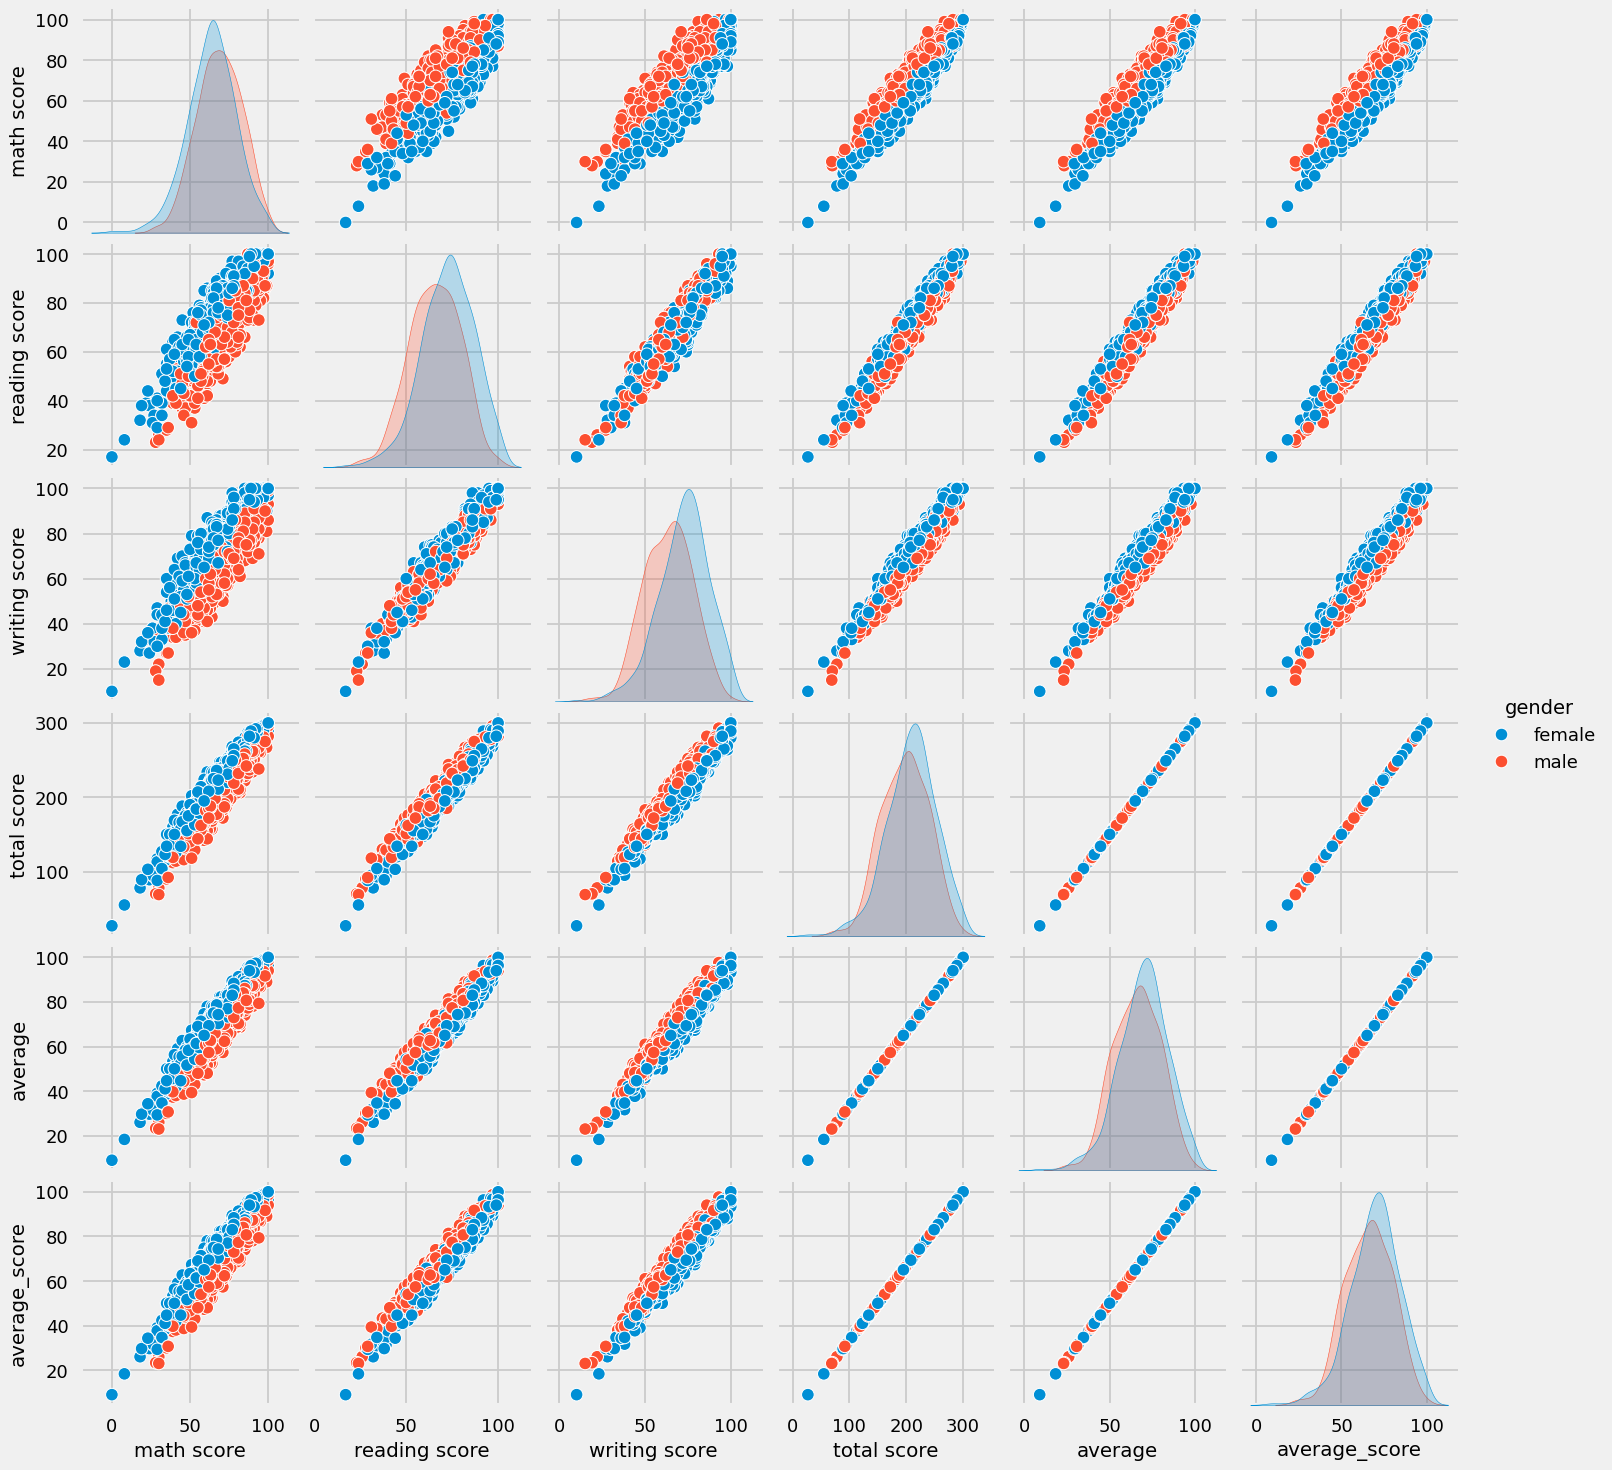

In [ ]:
# Create a pairplot (scatterplot matrix) of the DataFrame
# hue='gender': Colors points by gender category (creates separate colors for male/female)
# This creates scatterplots for all numerical variable pairs and histograms on diagonal
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.